<span dir="rtl" style="font-family:B Nazanin" align="right">
    <h1>فصل پنجم: یادگیری ماشین</h1>
    <h2>بخش سوم: رگرسیون</h2>
</span>

<p style="font-family:B Nazanin">
    <b>رگرسیون چندجمله‌ای (Polynomial Regression):</b><br>
    تاکنون با رگرسیون خطی آشنا شدیم که در آن یک یا چند ویژگی داشتیم که متغیر وابسته با آن‌ها رابطه خطی داشت و بر اساس فرمول رگرسیون خطی، ارتباط بین متغیر وابسته و متغیرهای مستقل را پیدا می‌کردیم که در واقع به معنای پیدا کردن ضرایب معادله یا همان ضرایب متغیرهای مستقل بود. اما حالت‌هایی وجود دارد که ممکن است متغیر مستقل ما یک متغیر تکی نباشد،‌بلکه از ترکیب چند متغیر مستقل به وجود آمده باشد. در این حالت دیگر از رگرسیون خطی استفاده نمی‌کنیم،‌بلکه فرمول معادله به صورت یک چندجمله‌ای است که باید ضرایب توان‌های مختلف متغیر مستقل را به دست آوریم. 
</p>

$$
h_w(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 = w^T X\\
w = \begin{bmatrix}w_0\\w_1\\w_2\\w_3\\w4\end{bmatrix}, \qquad 
X = \begin{bmatrix}1\\x\\x^2\\x^3\\x^4\end{bmatrix}
$$

<p style="font-family:B Nazanin">
    فرض کنید که ما ابعاد یک خانه (یعنی طول و عرض آن) را داریم و می‌خواهیم قیمت آن را پیش‌بینی کنیم. می‌دانیم که طول و عرض به تنهایی در قیمت خانه اثر ندارد، بلکه حاصل ضرب آنها که یک متغیر جدید است در پیش‌بینی قیمت آن خانه موثر است. بنابراین در این موارد از رگرسیون چندجمله‌ای استفاده می‌کنیم. <br>
    در اینجا دیتاستی به نام House Sales in King County داریم که اطلاعات قیمتی تعدادی خانه در شهر King County آمریکا است که می‌خواهیم با استفاده از ویژگی‌های مختلف، قیمت خانه را پیش‌بینی کنیم. در این دیتاست ویژگی‌های زیر وجود دارد.<br>
    * id: شناسه<br>
    * date: تاریخ فروش خانه<br>
    * price: قیمت (که هدف پیش‌بینی است)<br>
    * bedrooms: تعداد اتاق‌های خواب <br>
    * bathrooms: تعداد حمام‌ها <br>
    * sqft_living: مساحت خانه <br>
    * sqft_lot: مساحت زمین<br>
    * floors: تعداد طبقات<br>
    * waterfront: ساحل دریا<br>
    * view: مشاهده شده است یا نه<br>
    * condition: وضعیت کلی خانه<br>
    * grade: امتیاز واحد مسکونی، براساس سیستم امتیازدهی<br>
    * sqft_above: مساحت زیربنا<br>
    * sqft_basement: مساحت زیرزمین<br>
    * yr_built: سال ساخت<br>
    * yr_renovated: سال بازسازی<br>
    * zipcode: کد پستی<br>
    * lat: عرض جغرافیایی<br>
    * long: طول جغرافیایی
</p>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<p style="font-family:B Nazanin">
    ستون id برای ما فایده‌ای ندارد پس آن را حذف می‌کنیم. 
</p>

In [11]:
df.drop(["id"], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<p style="font-family:B Nazanin">
    اگر در ستون‌های عددی داده خالی وجود داشت می‌توانیم آن را مثلا با میانگین پر کنیم. 
</p>

In [12]:
mean = df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace(np.nan, mean)

mean = df['bathrooms'].mean()
df['bathrooms'] = df['bathrooms'].replace(np.nan, mean)

In [13]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<p style="font-family:B Nazanin">
     می‌خواهیم ببینیم ساحلی بودن خانه در قیمت اثر دارد یا خیر. از boxplot استفاده می‌کنیم:
</p>

<Axes: xlabel='waterfront', ylabel='price'>

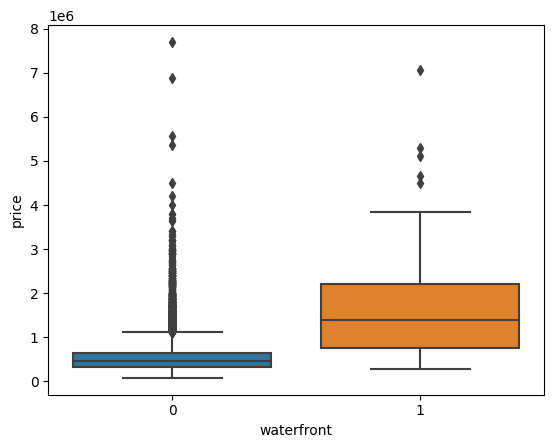

In [14]:
sns.boxplot(x='waterfront', y='price', data=df)

<p style="font-family:B Nazanin">
     تاثیر تعداد طبقات در قیمت خانه:
</p>

<Axes: xlabel='floors', ylabel='price'>

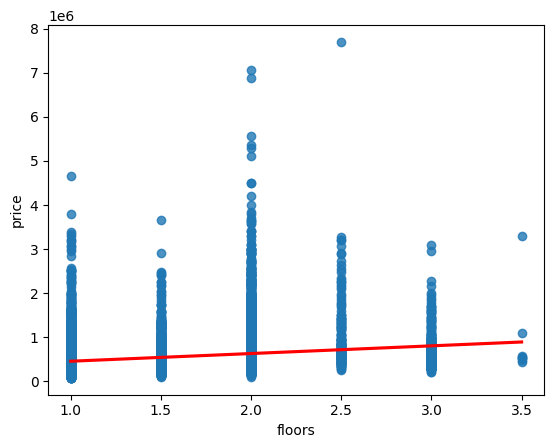

In [15]:
sns.regplot(x='floors', y='price', data=df, line_kws={'color':'red'})

<p style="font-family:B Nazanin">
     تاثیر مساحت زیربنا در قیمت:
</p>

<Axes: xlabel='sqft_above', ylabel='price'>

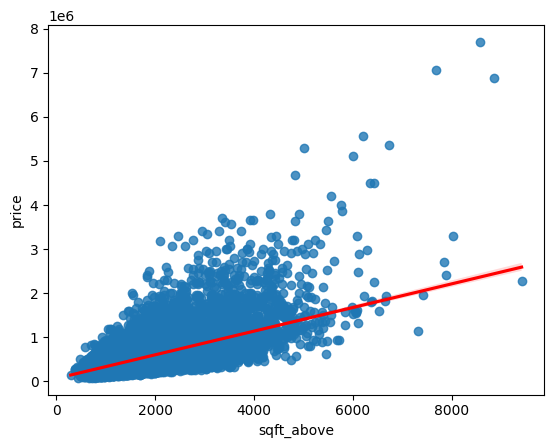

In [16]:
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color':'red'})

<p style="font-family:B Nazanin">
    یکی از نمودارهای بسیار مهم در تحلیل داده‌ها، نمودار همبستگی است که همیشه حتما باید رسم شود. در این نمودار بسیار مهم است که فقط مقادیر عددی بررسی شوند. 
</p>

<Axes: >

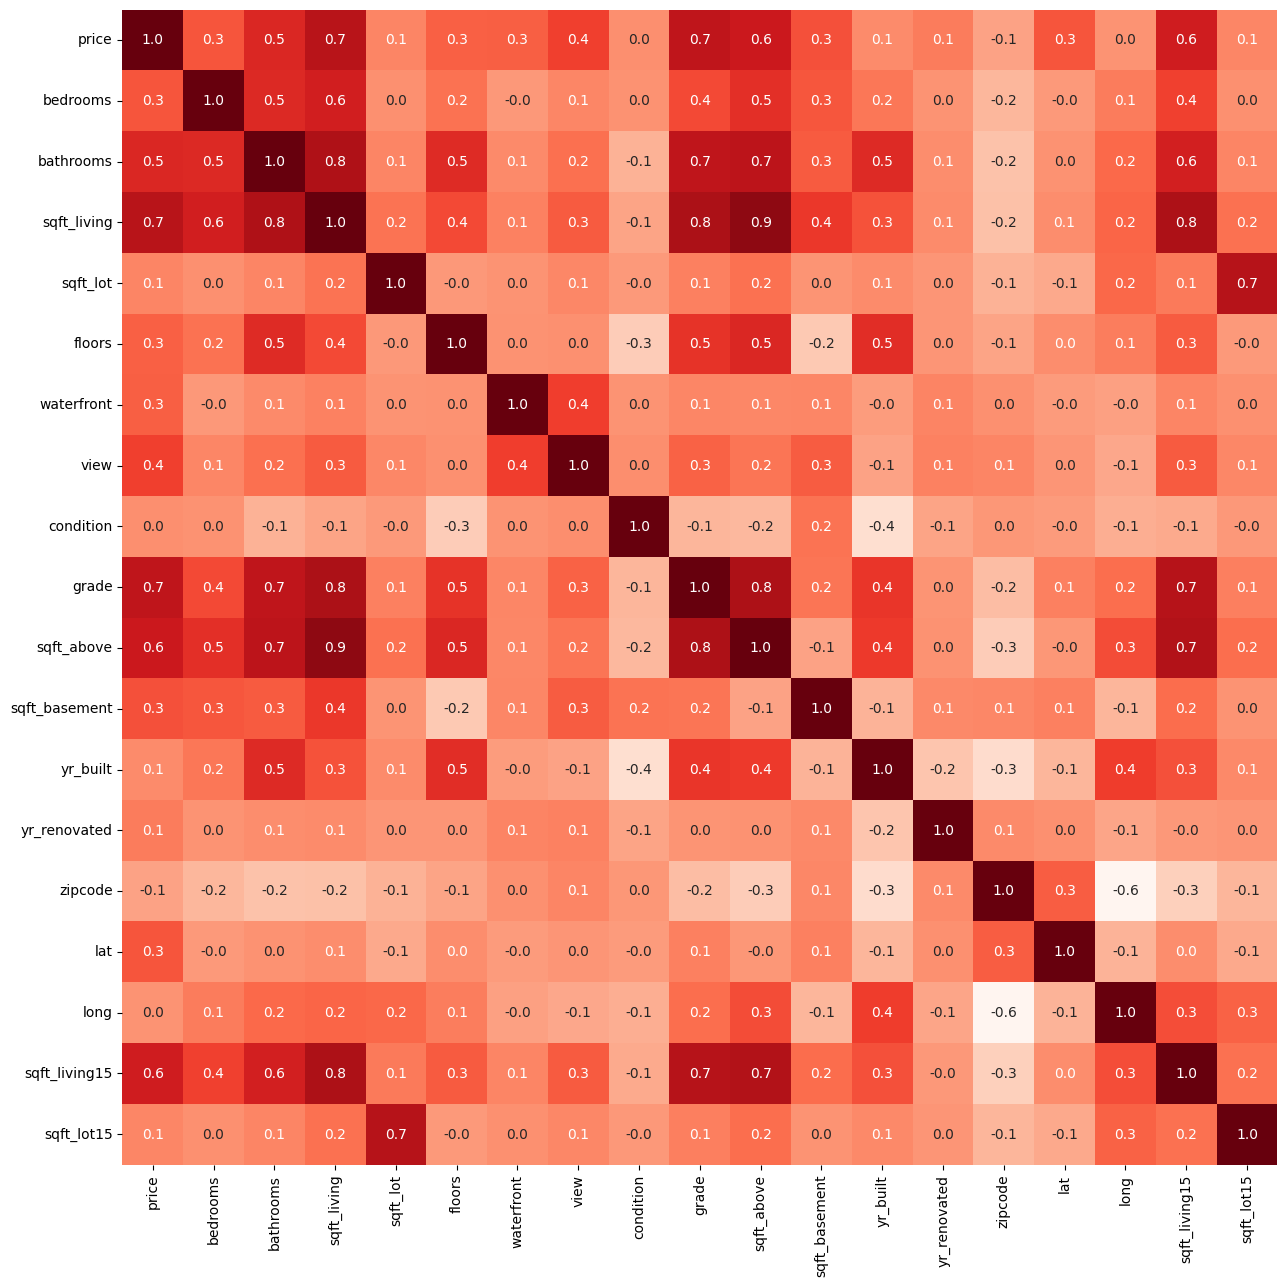

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), cbar=False, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')

<p style="font-family:B Nazanin">
     همان طور که می‌بینیم قیمت خانه با متغیرهایی مانند مساحت خانه، امتیاز خانه بیشترین ارتباط را دارد.<br>
    در اینجا در ابتدا یک رگرسیون خطی یک متغیره با مساحت خانه انجام می‌دهیم:
</p>

In [23]:
X = df[['sqft_living']]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared = {r2}")

R-squared = 0.49016883616018136


<p style="font-family:B Nazanin">
     روش دیگر محاسبه r2 استفاده از تابع score است:
</p>

In [25]:
X = df[['sqft_living']]
y = df[['price']]

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.49016883616018136

<p style="font-family:B Nazanin">
     در مرحله بعد یک رگرسیون چند متغیره ایجاد می‌کنیم:
</p>

In [26]:
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared = {r2}")

R-squared = 0.6466684653945339


<p style="font-family:B Nazanin">
     در نهایت می‌خواهیم از رگرسیون چندجمله‌ای استفاده کنیم. برای این کار می‌توانیم در ماژول sklearn از کلاس PolynomialFeatures استفاده کنیم تا ویژگی‌ها را با هم ترکیب کند. باید درجه لازم را به عنوان ورودی به این کلاس بدهیم.
</p>

In [27]:
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)
model.fit(X_train_poly, y_train)
model.score(X_test_poly, y_test)

0.7249662013549748

<p style="font-family:B Nazanin">
     می‌توانیم درجه بالاتر بدهیم تا شاید رگرسیون بهتر و با دقت بالاتری انجام شود:
</p>

In [28]:
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)
model.fit(X_train_poly, y_train)
model.score(X_test_poly, y_test)

0.737227739584869

<p style="font-family:B Nazanin">
    <b>ابزار PipeLine:</b><br>
    یکی از ابزارهای قدرتمند ماژول sklearn ابزار Pipeline است. گاهی اوقات لازم است که یک سری کار تکراری را پشت سر هم مرتبا انجام دهیم. برای این کار می‌توانیم یک pipeline تعریف کنیم و این کارها را به آن معرفی کنیم و از اینجا به بعد با هر بار فراخوانی این pipeline تمامی آن کارها به ترتیب انجام خواهد شد. مثلا در مثال زیر ابتدا مجموعه داده استانداردسازی می‌شود، سپس با روش pca کاهش ابعاد را انجام می‌دهیم و در نهایت یک مدل رگرسیون خطی ایجاد می‌شود. 
</p>

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [31]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9487780710773177

<p style="font-family:B Nazanin">
     مثال. House Sales in King County
</p>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [33]:
df = pd.read_csv('datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
df.drop(["id"], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
mean = df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace(np.nan, mean)

mean = df['bathrooms'].mean()
df['bathrooms'] = df['bathrooms'].replace(np.nan, mean)

In [37]:
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X = df[features]
y = df['price']

pipelineInput = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

pipe = Pipeline(pipelineInput)
pipe.fit(X, y)
pipe.score(X, y)

0.7513450279485017

<p style="font-family:B Nazanin">
    <b>الگوریتم‌های Lasso Regression و Ridge Regression:</b><br>
    همان طور که قبلا توضیح دادیم، منظم‌سازی یکی از روش‌هایی است که کمک می‌کند تا overfitting کاهش یابد. در تکنیک‌های منظم‌سازی (Regularization) به تابع هزینه عبارتی اضافه می‌کردیم که ضرایب معادله رگرسیون را کاهش دهد (در روش L1 مجموع قدر مطلق ضرایب و در روش L2 مجموع مربعات ضرایب). با این کار میزان overfitting کاهش می‌یابد. <br>
    الگوریتم‌های رگرسیون Lasso و Ridge هم کارشان همین است که با اضافه کردن یک سری محدودیت به مدل، مدل را منظم کنند که در واقع این الگوریتم‌ها همان تکنیک‌های منظم‌سازی مدل هستند. این الگوریتم‌ها محدودیت‌هایی به مدل اضافه می‌کنند تا اندازه ضرایب ($w$ها یا $\beta$ها) کاهش یابد و در نتیجه مقدار overfitting کاهش یابد. <br>
    روش Lasso به این صورت عمل می‌کند که ضریب یک ویژگی را آن قدر کاهش می‌دهد که حتی ممکن است گاهی به صفر برسد. یعنی دیگر آن ویژگی اثری در تابع رگرسیون ندارد. هدف اصلی این روش این است که دقت کار را بالا ببرد. اما گاهی این روش خوب عمل نمی‌کند. مثلا اگر تعداد کل ویژگی‌ها کم باشد و این روش نیز تعدادی از آن‌ها را حذف کند اثر معکوس می‌گذارد. یا زمانی که ویژگی‌ها همبستگی زیادی با یکدیگر داشته باشند، با از بین بردن بعضی از آن‌ها تاثیر منفی روی عملکرد مدل می‌گذاریم. <br>
    اما روش Ridge فقط ضرایب را کاهش می‌دهد ولی به صفر نمی‌رساند. همان طور که در شکل زیر دیده می‌شود، روش Ridge سعی می‌کند تا مجموع مربعات ضرایب از عدد مشخصی کوچکتر شود. <br>
    معمولا در زمانی که همبستگی زیادی بین ویژگی‌ها وجود دارد، تکنیک Ridge بسیار بهتر از Lasso عمل می‌کند. 
</p>

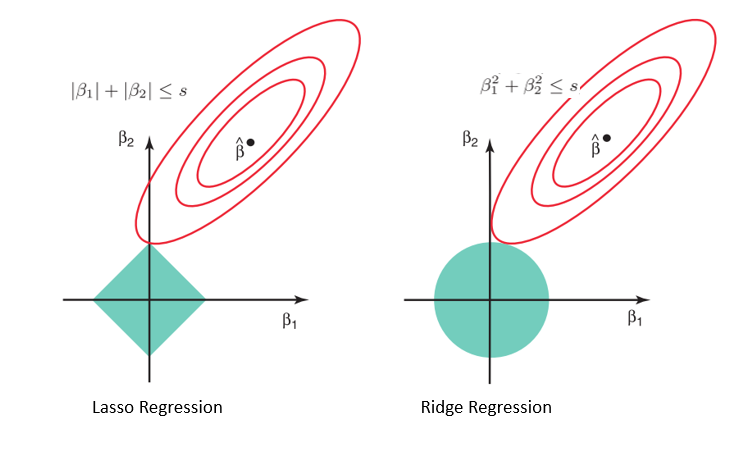

<p style="font-family:B Nazanin">
     نکته مهم اینجاست که زمانی که می‌خواهیم از این روش‌ها استفاده کنیم باید میزان همبستگی بین ویژگی‌ها شرایط خاصی داشته باشد. گاهی اوقات همبستگی چندخطی داریم. یعنی در مدل دو یا چند ویژگی به میزان بسیار زیادی به هم همبستگی دارند و با تغییر یا حذف یکی، ممکن است اثر منفی روی دیگری گذاشته شود. مثلا می‌خواهید مدلی برای پیش‌بینی قیمت خانه‌ها بر اساس مساحت خانه، تعداد اتاق‌ها و تعداد حمام‌ها ایجاد کنید. در اکثر مواقع مساحت خانه و تعداد اتاق‌ها با یکدیگر همبستگی دارند. هرچقدر مساحت خانه بیشتر باشد، معمولا تعداد اتاق‌ها هم بیشتر است. فرض کنید مدل ما دو ویژگی دیگر نیز داشته باشد: تعداد پارکینگ‌ها و فاصله از مرکز شهر. حال اگر این طور در نظر بگیریم که فاصله از مرکز شهر با مساحت خانه و تعداد اتاق‌ها همبستگی داشته باشد، (مثلا خانه‌های بزرگتر معمولا در مناطقی باشند که از مرکز شهر دورتر هستند) این مدل ممکن است با مشکل همبستگی چندخطی روبرو شود. در واقع ممکن است مدل فرض کند که فاصله از مرکز شهر تاثیر مستقیم بر قیمت خانه دارد. در صورتی که در واقعیت این طور نیست و تاثیر توسط مساحت خانه و تعداد اتاق‌ها اتفاق افتاده است و این که یک خانه در حاشیه شهر قرار گرفته، دلیل بر افزایش قیمت آن نیست. در اینجا می‌گوییم نوع همبستگی این متغیرها چندخطی است و می‌توانیم از روش‌هایی مانند منظم‌سازی (Regularization) یا کاهش ابعاد استفاده کنیم تا تعداد ویژگی‌ها را کم کنیم یا اثر بعضی از ویژگی‌ها را کاهش بدهیم تا مدل بهتر بتواند برای ما کار کند. <br>
    از رگرسیون Ridge زمانی استفاده می‌کنیم که معمولا کمتر از صد هزار رکورد یا نمونه در اختیار داریم. به طور کلی کاربردهای اصلی Ridge عبارتند از: پیش‌بینی بازارهای مالی، پیش‌بینی بازار مسکن، بررسی تاثیر دارو، پیش‌بینی میزان بارندگی، پیش‌بینی پیشرفت تحصیلی و ... . <br>
    یکی از مهمترین مراحلی که باید در این دو الگوریتم در نظر بگیریم، تعیین پارامتر آلفا ($\alpha$) است. هر دو پارامتر نیاز دارند تا هایپرپارامتر $\alpha$ برای آن‌ها تنظیم شود. این پارامتر معیاری است تا شدت اثرگذاری این تنظیمات را کنترل می‌کند. تعیین مقدار $\alpha$ یک کار تجربی است تا بتواند بهترین خروجی را برای ما داشته باشد که برای بررسی آن می‌توان از روش‌های Cross Validation نیز استفاده کرد. 
</p>

<p style="font-family:B Nazanin">
     مثال. در اینجا می‌خواهیم دیتابیس Auto MPG را بررسی کنیم که میزان مصرف سوخت خودروهای مختلف را نشان می‌دهد (Mileage Per Gallon یا مقدار مایلی که یک خودرو با یک گالن سوخت حرکت می‌کند). فیلدهایی که در این دیتاست وجود دارد عبارتند از: <br>
    * mpg: مقدار مایل حرکت خودرو با یک گالن سوخت <br>
    * cylinders: تعداد سیلندر خودرو <br>
    * dispacement: مقدار جابجایی <br>
    * horsepower: توان خودرو بر حسب اسب بخار <br>
    * weight: وزن خودرو <br>
    * acceleration: شتاب خودرو <br>
    * model year: سال تولید خودرو <br>
    * origin: محل تولید خودرو (اروپا، آسیا، آمریکا و ...) <br>
    * car name: نام خودرو
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [12]:
df.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [14]:
df['origin'].value_counts().to_frame()

,origin
1,249
3,79
2,70


In [16]:
(df['horsepower'].str.isnumeric() == False).sum()

6

<p style="font-family:B Nazanin">
      6 داده در ستون horsepower عددی نیستند.
</p>

In [17]:
(df['horsepower'] == '?').sum()

6

In [18]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


<p style="font-family:B Nazanin">
      برای پاکسازی داده‌ها در ابتدا مواردی که توان خودرو بر حسب اسب بخار مقدار عددی ندارد (به جای آن ? نوشته شده است) را با NaN پر می‌کنیم. 
</p>

In [19]:
df = df.replace('?', np.nan)

<p style="font-family:B Nazanin">
      ستون نام خودرو که یک ستون متنی است کاربردی برای ما ندارد و آن را حذف می‌کنیم.
</p>

In [20]:
df = df.drop('car name', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


<p style="font-family:B Nazanin">
      مقادیر NaN را با میانه داده‌ها پر می‌کنیم.
</p>

In [21]:
df = df.apply(lambda x: x.fillna(x.median()), axis=0)

<p style="font-family:B Nazanin">
      نوع داده‌های ستون horsepower را از object به داده عددی تبدیل می‌کنیم.
</p>

In [22]:
df['horsepower'] = df['horsepower'].astype(int)
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

<p style="font-family:B Nazanin">
      مصورسازی داده‌ها: <br>
      همبستگی متغیرها:
</p>

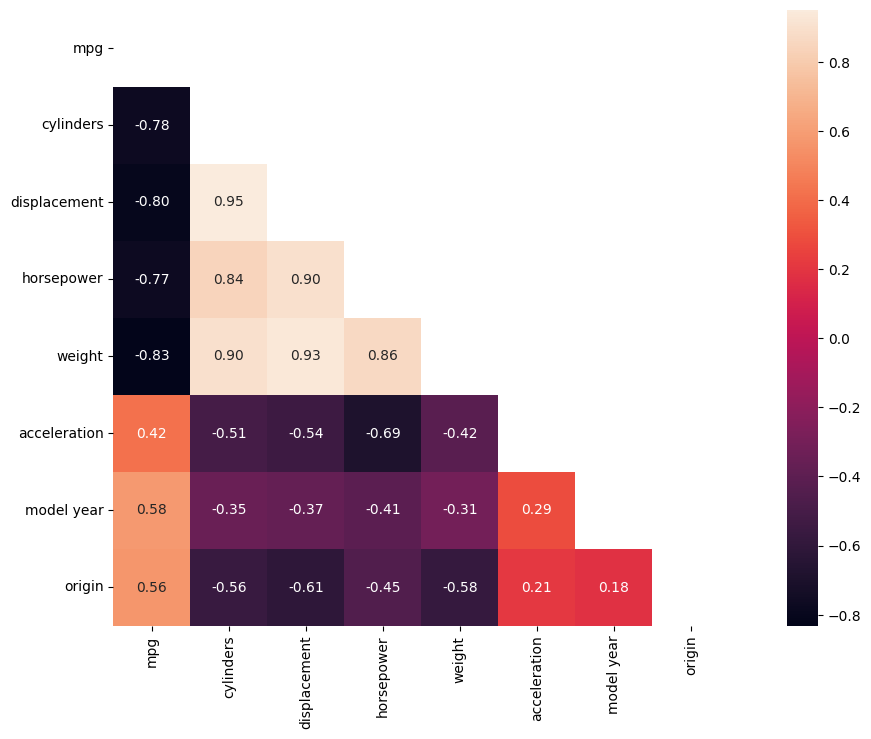

In [24]:
plt.figure(figsize=(15, 8))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, square=True, mask=mask, annot=True, fmt='.2f')
plt.show()

<p style="font-family:B Nazanin">
      تعداد خودروهای ساخته شده در هر قاره:
</p>

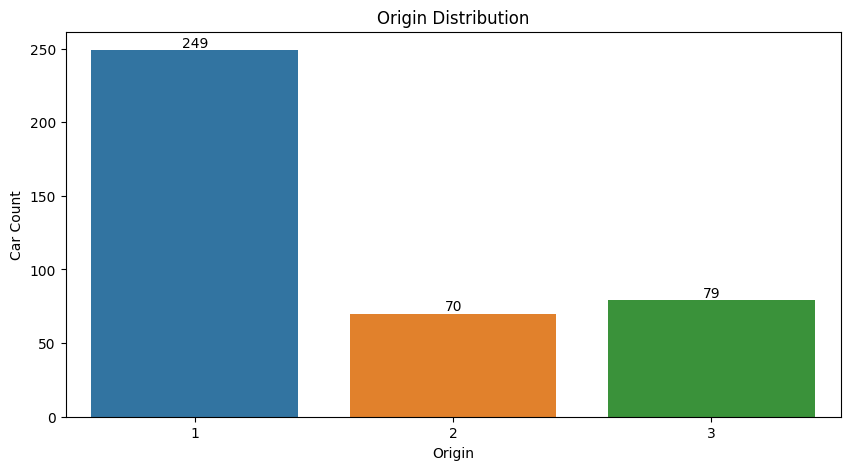

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='origin')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Origin Distribution')
plt.xlabel('Origin')
plt.ylabel('Car Count')
plt.show()

<p style="font-family:B Nazanin">
      میزان mpg خودروها بر حسب سال ساخت به تفکیک کشور سازنده:
</p>

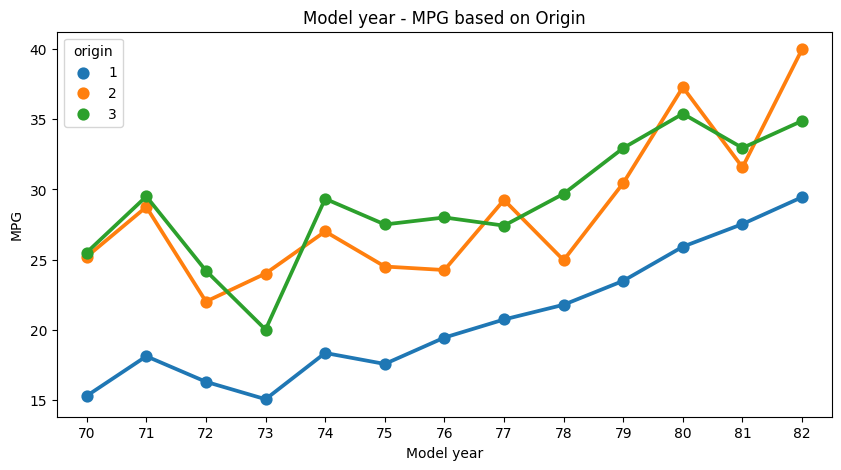

In [26]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x='model year', y='mpg', hue='origin', errorbar=None)
plt.title('Model year - MPG based on Origin')
plt.xlabel('Model year')
plt.ylabel('MPG')
plt.show()

<p style="font-family:B Nazanin">
      بر اساس این نمودار می‌بینیم که هر چه سال ساخت خودروها جدیدتر می‌شود، به طور کلی میزان MPG افزایش می‌یابد. با این حال در طول سالیان متفاوت خودروهای ساخت آمریکا (origin = 1) میزان MPG کمتری نسبت به سایر خودروها داشته‌اند. 
</p>

<Axes: xlabel='year', ylabel='MPG'>

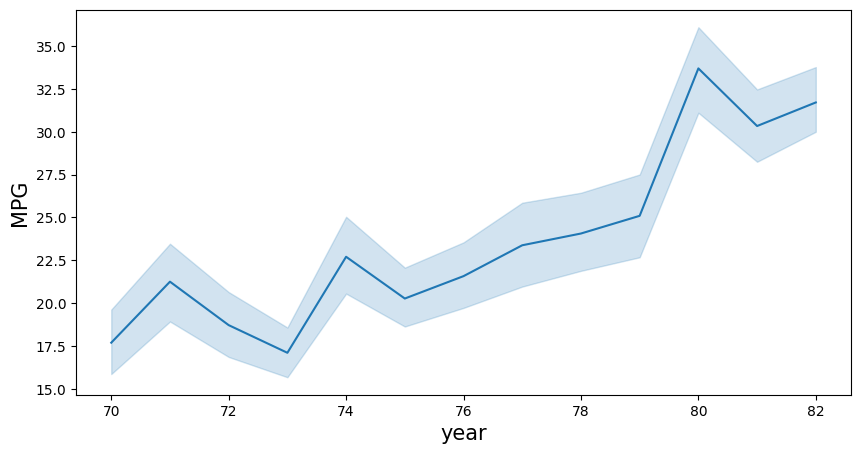

In [27]:
plt.figure(figsize=(10, 5))
plt.xlabel('year', fontsize=15)
plt.ylabel('MPG', fontsize=15)
sns.lineplot(data=df, x='model year', y='mpg')

<p style="font-family:B Nazanin">
      تعداد خودروها بر اساس تعداد سیلندر:
</p>

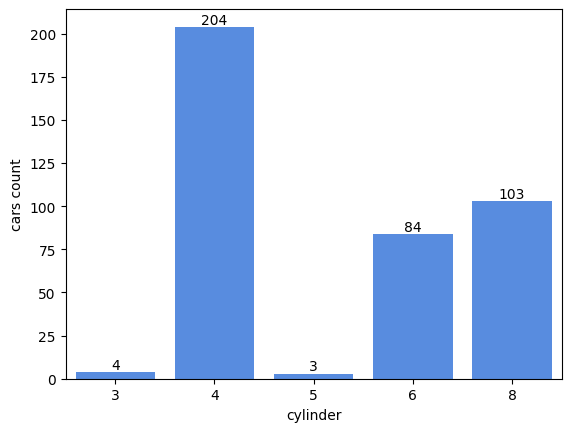

In [28]:
ax = sns.countplot(data=df, x='cylinders', color='#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('cylinder')
plt.ylabel('cars count')
plt.show()

<p style="font-family:B Nazanin">
      میزان MPG بر حسب اسب بخار:
</p>

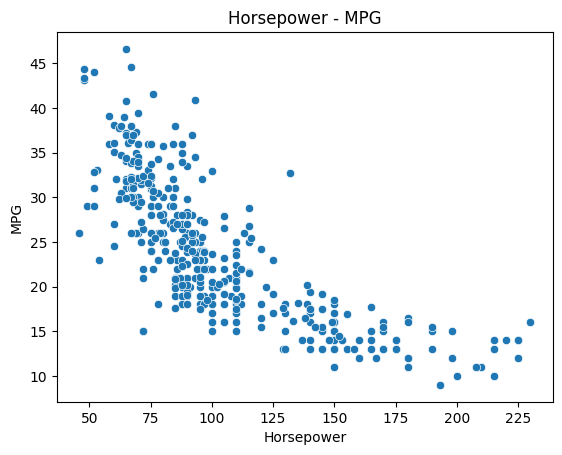

In [29]:
sns.scatterplot(data=df, x='horsepower', y='mpg')
plt.title('Horsepower - MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

<p style="font-family:B Nazanin">
      برای ساخت مدل ابتدا تمام ستون‌ها به جز mpg را در ماتریس X و ستون mpg را به عنوان ستون متغیر وابسته در بردار y می‌ریزیم.
</p>

In [30]:
X = df.drop('mpg', axis=1)
y = df[['mpg']]
print(X.shape)
print(y.shape)

(398, 7)
(398, 1)


<p style="font-family:B Nazanin">
      اگر در مرحله پیش‌پردازش داده‌ها را مقیاس‌بندی نکرده باشیم، در این مرحله می‌توانیم این کار را انجام دهیم:
</p>

In [31]:
# X_scaled = preprocessing.scale(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# y_scaled = preprocessing.scale(y)
# y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

# X_scaled.shape
# y_scaled.shape

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<p style="font-family:B Nazanin">
      در ابتدا یک مدل رگرسیون خطی معمولی ایجاد می‌کنیم و آموزش می‌دهیم:
</p>

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
for i, col_name in enumerate(X_train.columns):
    print(f"Regression model coefficient for {col_name} => \t\t\t {model.coef_[0][i]}")
    
print(f"Intercept => {model.intercept_[0]}")

Regression model coefficient for cylinders => 			 -0.27839835574965555
Regression model coefficient for displacement => 			 0.017945885956041026
Regression model coefficient for horsepower => 			 -0.015941309405825037
Regression model coefficient for weight => 			 -0.0067087498033689946
Regression model coefficient for acceleration => 			 0.10799192624266976
Regression model coefficient for model year => 			 0.793683868322427
Regression model coefficient for origin => 			 1.334375300638238
Intercept => -20.963138663631046


In [37]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8102080061039307
0.8641192964254737


<p style="font-family:B Nazanin">
      یک بار نیز با مدل Ridge داده‌ها را آموزش می‌دهیم (برای این مدل باید پارامتر $\alpha$ را تعیین کنیم):
</p>

In [38]:
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)

Ridge(alpha=0.2)

In [40]:
for i, col_name in enumerate(X_train.columns):
    print(f"Ridge model coefficient for {col_name} => \t\t\t {ridge.coef_[0][i]}")
    
print(f"Intercept => {ridge.intercept_[0]}")

Ridge model coefficient for cylinders => 			 -0.27738245215348795
Ridge model coefficient for displacement => 			 0.01791295987228359
Ridge model coefficient for horsepower => 			 -0.015921341983331075
Ridge model coefficient for weight => 			 -0.006709063358038322
Ridge model coefficient for acceleration => 			 0.1079209917821362
Ridge model coefficient for model year => 			 0.7936495848410887
Ridge model coefficient for origin => 			 1.332005770919568
Intercept => -20.956002708157595


In [41]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.810207970904321
0.8641032432221173


<p style="font-family:B Nazanin">
      یک بار نیز با مدل Lasso داده‌ها را آموزش می‌دهیم (پارامتر $\alpha$ را نیز باید مشخص کنیم):
</p>

In [43]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [45]:
for i, col_name in enumerate(X_train.columns):
    print(f"Ridge model coefficient for {col_name} => \t\t\t {lasso.coef_[i]}")
    
print(f"Intercept => {lasso.intercept_[0]}")

Ridge model coefficient for cylinders => 			 -0.0
Ridge model coefficient for displacement => 			 0.01101403601588961
Ridge model coefficient for horsepower => 			 -0.015019391497785974
Ridge model coefficient for weight => 			 -0.006686376409977939
Ridge model coefficient for acceleration => 			 0.07247924891612756
Ridge model coefficient for model year => 			 0.7860047927608316
Ridge model coefficient for origin => 			 1.0261295227591005
Intercept => -19.677118084686644


In [46]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.810207970904321
0.8641032432221173


<p style="font-family:B Nazanin">
      همان طور که می‌بینید در حالت Lasso ضریب متغیر cylinders صفر شده است. هر چه مقدار $\alpha$ را بیشتر کنیم، احتمال اینکه ضریب متغیرهای بیشتری صفر شود، بیشتر می‌شود. مثلا:
</p>

In [47]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

for i, col_name in enumerate(X_train.columns):
    print(f"Ridge model coefficient for {col_name} => \t\t\t {lasso.coef_[i]}")
    
print(f"Intercept => {lasso.intercept_[0]}")

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

Ridge model coefficient for cylinders => 			 -0.0
Ridge model coefficient for displacement => 			 0.0019779172494751645
Ridge model coefficient for horsepower => 			 -0.00929244362968221
Ridge model coefficient for weight => 			 -0.00658992964942769
Ridge model coefficient for acceleration => 			 0.0
Ridge model coefficient for model year => 			 0.7531980134435987
Ridge model coefficient for origin => 			 0.0
Intercept => -13.56586578237923
0.810207970904321
0.8641032432221173


<p style="font-family:B Nazanin">
      برای ارزیابی مثلا مدل Lasso بر اساس $\alpha$های مختلف می‌توانیم از cross validation استفاده کنیم. یعنی با استفاده از $\alpha$های مختلف score مدل خود را محاسبه کرده و با یکدیگر مقایسه کنیم (البته این کار برای مدل‌هایی با تعداد داده کم معمولا جواب می‌دهد): 
</p>

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
import numpy as np

X = df.drop('mpg', axis=1)
y = df[['mpg']]

alphas = [round(num, 2) for num in np.arange(0.1, 1, 0.05)]
for a in alphas:
    lasso = Lasso(alpha=a)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    lasso.fit(X_train, y_train)
    print(lasso.score(X_train, y_train))
    print(lasso.score(X_test, y_test))
    print("---------------------------------------")

0.8093625228398579
0.8602489000629899
---------------------------------------
0.8087050701175166
0.8591231755577021
---------------------------------------
0.8077846671661588
0.8576822416694705
---------------------------------------
0.8066013129215989
0.855925954808505
---------------------------------------
0.8051549123930659
0.8538544980289264
---------------------------------------
0.8036436847475892
0.8517245565270893
---------------------------------------
0.801915800119057
0.8493614526223694
---------------------------------------
0.7999575503790766
0.8467482252419274
---------------------------------------
0.7990205472990484
0.8457778392190498
---------------------------------------
0.7989424580228661
0.8461261254188808
---------------------------------------
0.7988570455154049
0.8464662252894531
---------------------------------------
0.7987640823984185
0.8467971088512196
---------------------------------------
0.798663680642399
0.8471193121051721
-----------------------------

<p style="font-family:B Nazanin">
      در اینجا می‌بینیم که با افزایش مقدار $\alpha$ میزان score مدل آموزش‌دیده کمتر شده است. پس بهترین مقدار $\alpha = 0.1$ است.
</p>

<p style="font-family:B Nazanin">
    <b>الگوریتم Elastic Net Regression:</b><br>
    همان طور که در قسمت قبل توضیح داده شد، الگوریتم‌های Ridge و Lasso ایجاد شدند تا با استفاده از متدهای منظم‌سازی L1 و L2 مقدار ضرایب رگرسیون را کاهش دهند. برای این کار در روش Lasso مجموع قدرمطلق ضرایب و در روش Ridge مجموع مربعات ضرایب به تابع هدف اضافه شد تا با مینیمم کردن تابع هدف، ضرایب نیز کاهش یابند. اما گاهی مشکلی که به وجود می‌آید این است که در روش Lasso ممکن است ضریبی صفر شود که متغیر متناظر با آن اثر زیادی روی خروجی داشته باشد و یا در روش Ridge متغیری (ضریبی) باقی بماند که ضرورتی نداشته باشد. بنابراین روش Elastic Net Regression معرفی شد که در واقع ترکیبی از هر دو روش Lasso و Ridge است و هم مجموع مربعات و هم مجموع قدر مطلق ضرایب را به تابع هدف اضافه می‌کند. در این صورت می‌توانیم بین این دو روش تعادلی به وجود می‌آوریم.
</p>

$$
argmin_\beta \sum (y_i - \beta'x_i)^2 + \lambda_1 \sum |\beta_k| + \lambda_2 \sum \beta_k^2
$$

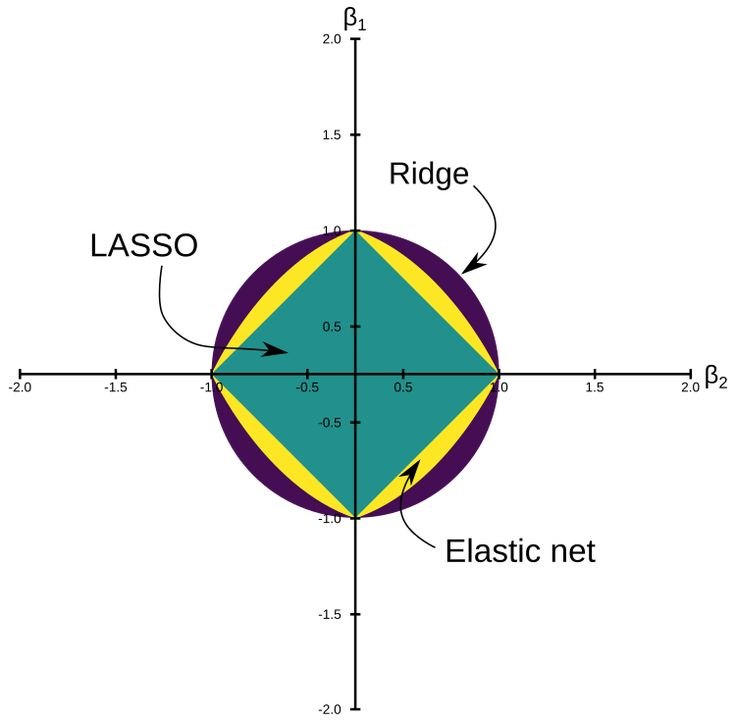

<p style="font-family:B Nazanin">
      بر خلاف روش‌های Lasso و Ridge که فقط هایپرپارامتر $\alpha$ را برای آن مشخص می‌کردیم، در مدل Elastic Net Regression باید دو پارامتر $\alpha$ و l1_ration را تعیین کنیم. پارامتر $\alpha$ همان نرخ یادگیری است که تعیین می‌کند میزان تاثیر روی کاهش ضرایب چقدر باشد (یعنی هر چه $\alpha$ بیشتر شود، ضرایب بیشتر کاهش می‌یابند) و پارامتر l1_ratio (که عددی بین صفر و یک است) تعیین می‌کند که تاثیر هر کدام از متدهای منظم‌سازی L1 و L2 چقدر باشد. به عبارت دیگر اگر l1_ratio برابر با صفر در نظر گرفته شود، عملا اثر L1 از بین می‌رود و این الگوریتم دقیقا مانند Ridge عمل می‌کند و برعکس اگر یک باشد، اثر L2 از بین می‌رود و این الگوریتم کاملا مانند Lasso کار می‌کند. <br>
    برای تست این الگوریتم از همان مثال قبل و دیتاست Auto MPG استفاده می‌کنیم. مراحل پیش‌پردازش دقیقا مانند قبل است و مراحل Visualization مجددا نوشته نمی‌شود.
</p>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [51]:
df = pd.read_csv('./datasets/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [53]:
df = df.replace('?', np.nan)

df = df.drop('car name', axis=1)

df = df.apply(lambda x: x.fillna(x.median()), axis=0)

df['horsepower'] = df['horsepower'].astype(int)

X = df.drop('mpg', axis=1)
y = df[['mpg']]
print(X.shape)
print(y.shape)

(398, 7)
(398, 1)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)

Ridge(alpha=0.2)

In [59]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [60]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.2)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.5, l1_ratio=0.2)

In [61]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.810207970904321
0.8641032432221173


In [62]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7990205472990484
0.8457778392190498


In [63]:
print(elastic.score(X_train, y_train))
print(elastic.score(X_test, y_test))

0.80564787590788
0.8551491899716919


<p style="font-family:B Nazanin">
      در اینجا می‌توانیم با تغییر دادن هایپرپارامترهای $\alpha$ و l1_ratio کاری کرد که عملکرد مدل Elastic بهتر شود و score بالاتری داشته باشد. در قسمت بعد یاد می‌گیریم که چگونه بهینه‌ترین مقادیر را برای هایپرپارامترها انتخاب کنیم.
</p>

<p style="font-family:B Nazanin">
    <b>روش‌های یافتن هایپرپارامترهای بهینه:</b><br>
    تا اینجا با این مسئله مدام روبرو شده‌ایم که باید برای برخی از الگوریتم‌ها، هایپرپارامترهایی را انتخاب کنیم. همان طور که قبلا گفتیم انتخاب این هایپرپارامترها معمولا به صورت تجربی انتخاب می‌شود اما روش‌هایی نیز ابداع شده است که به انتخاب بهینه مقدار هایپرپارامترها کمک می‌کند. در روش‌های دستی این طور گفته می‌شد که یا با استفاده از تجربه قبلی مقدار هایپرپارامترها را انتخاب کنیم یا آن قدر مقادیر مختلف را آزمایش کنیم تا مقدار بهینه را پیدا کنیم اما اصلی‌ترین روش‌های علمی که برای انتخاب بهینه این هایپرپارامترها وجود دارد عبارتند از: <br>
    1. Grid Search: روشی است که چندان پر استفاده نیست و برای مواردی به کار می‌رود که مدل ساده باشد و تعداد داده‌ها زیاد نباشد. <br>
    2. Random Search: پر استفاده‌ترین روش است که بسیار بهتر از Grid Search است و به سادگی قابل استفاده است.<br>
    3. Bayesian Optimization: روش پیچیده‌ای است که می‌تواند نتایج بسیار خوبی به دست بدهد ولی زمان بسیار زیادی را برای داده‌های زیاد صرف می‌کند و در بسیاری از مواقع قابل استفاده نیست. پشت ورده این روش تعداد زیادی از فرمول‌های ریاضی وجود دارد و از فرایندهای احتمالاتی استفاده می‌کند. <br>
    4. Cross Validation: روشی است که قبلا نیز در مورد آن توضیح داده شده است و با تکرار و انتخاب بخش‌های تست و آموزش، به حالت بهینه می‌رسد. 
</p>

<p style="font-family:B Nazanin">
    <b>روش Grid Search:</b><br>
    فرض کنید که فقط دو هایپرپارامتر داشته باشیم. مطابق با شکل زیر با انتخاب مقادیر مختلف برای هر یک از این دو پارامتر، یک نقطه در یک فضای دو بعدی ایجاد می‌شود. در روش Grid Search باید برای تمام نقاط ممکن (یعنی تمامی مقادیر ممکن برای هر یک از هایپرپارامترها) یک بار مدل را آموزش دهیم و بر اساس داده‌ها، میزان score را محاسبه کنیم و متوجه بشویم که برای کدام مقادیر بیشترین score را خواهیم داشت. با توجه به این که در این روش تعداد دفعات آموزش مدل و ارزیابی آن زیاد است، فقط برای مواقعی کاربرد دارد که حجم داده‌ها کم باشد و مقادیر پارامترها نیز کوچک باشد. اما اگر حجم داده‌ها زیاد باشد یا اینکه تعداد هایپرپارامترها و همچنین محدوده مقدار آن‌ها بزرگ باشد، زمان بسیار زیادی برای این روش صرف می‌شود و اصلا به صرفه نیست. 
</p>

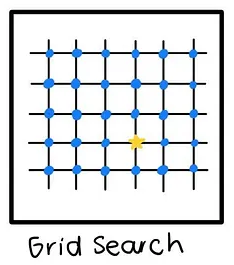

<p style="font-family:B Nazanin">
    <b>روش Random Search:</b><br>
    این روش مشابه با روش Grid Search، باز هم تمام مقادیر ممکن برای تمام هایپرپارامترها را در نظر می‌گیریم ولی فقط تعداد محدودی از آن‌ها را به صورت تصادفی انتخاب کرده و بررسی می‌کنیم تا به یک مقدار بهینه برسیم. در این روش ممکن است به خاطر انتخاب تصادفی هایپرپارامترها و این که تمامی مقادیر بررسی نمی‌شوند، بهینه‌ترین حالت مقادیر پیدا نشوند، اما معمولا می‌توان در مدت زمان بسیار کوتاه‌تری نسبت به روش Grid Search، مقادیر مناسبی برای هایپرپارامترها پیدا کرد که تا حد زیادی بهینه باشند. 
</p>

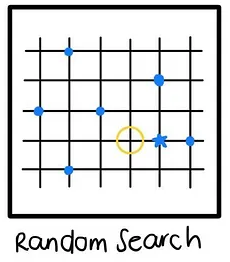

<p style="font-family:B Nazanin">
    <b>روش Bayesian Optimization:</b><br>
    این روش با استفاده از تخمین‌های احتمالاتی کار می‌کند. در مسائلی که تابع هدف بازه‌های مقادیر مختلفی را می‌گیرد، این روش می‌تواند کاربردی باشد. این روش نیز هزینه‌بر است اما می‌تواند ارزشمند باشد. مطابق با شکل زیر این روش در ابتدا یک نقطه (یک مجموعه از مقادیر انتخاب شده برای تمام هایپرپارامترها) را بررسی می‌کند و بر اساس آن و با استفاده از فرمول‌های احتمالاتی تخمین می‌زند که مقدار هایپرپارامترها را چگونه تغییر دهد تا به مقادیر بهینه برسد. این روش نه کاملا تصادفی است و نه این که همه نقاط را بررسی می‌کند بلکه با استفاده از فرمول‌های احتمالاتی تخمین می‌زند که تغییر هایپرپارامترها چگونه روی score مدل تاثیر می‌گذارد. با توجه به اینکه پس از انتخاب هر نقطه و محاسبه score مدل، نیاز است تا نقطه بعدی تخمین زده شود، این روش مقداری زمان‌بر است.  
</p>

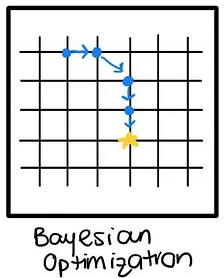

In [65]:
!pip install scikit-optimize

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from skopt import BayesSearchCV
import numpy as np

In [67]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p style="font-family:B Nazanin">
      برای مثال در اینجا از مدل Elastic Net استفاده می‌کنیم که دو هایپرپارامتر دارد. برای استفاده از روش Grid Search یک دیکشنری از هایپرپارامترها می‌سازیم و مقادیر مختلف هایپرپارامترها را در آن تعریف می‌کنیم. انتخاب این مقادیر که باید تست شوند، کاملا تجربی است.
</p>

In [68]:
model = ElasticNet()
params = {
    'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

<p style="font-family:B Nazanin">
      برای ایجاد مدلی که از روش Grid Search استفاده کند باید موارد زیر را تعیین کنیم:<br>
    * estimator: مدلی است که بر اساس آن رگرسیون انجام می‌شود (در اینجا Elastic Net) <br>
    * param_grid: دیکشنری مقادیر هایپرپارامترها <br>
    * scoring: نام متدی است که بر اساس آن مدل ارزیابی می‌شود و score آن محاسبه می‌شود. (در اینجا r2)  لیست کامل متدها در ادامه آورده می‌شود.<br>
    * cv: تعداد cross validationها.
</p>

In [69]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=5
)
grid_search.fit(X_train, y_train)

print(f"Grid Search:\n============================")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Grid Search:
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best R2 Score: 0.9127508410382201


<p style="font-family:B Nazanin">
      متدهایی که بر اساس آن مدل ارزیابی می‌شود و score مدل محاسبه می‌شود به صورت زیر است:
</p>

<table>
    <tr><th>Method Name</th><th>Method Function</th></tr>
    <tr><td>'explained_variance'</td><td>metrics.explained_variance_score</td></tr>
    <tr><td>'max_error'</td><td>metrics.max_error</td></tr>
    <tr><td>'neg_mean_absolute_error'</td><td>metrics.mean_absolute_error</td></tr>
    <tr><td>'neg_mean_squared_error'</td><td>metrics.mean_squared_error</td></tr>
    <tr><td>'neg_root_mean_squared_error'</td><td>metrics.root_mean_squared_error</td></tr>
    <tr><td>'neg_mean_squared_log_error'</td><td>metrics.mean_squared_log_error</td></tr>
    <tr><td>'neg_median_absolute_error'</td><td>metrics.median_absolute_error</td></tr>
    <tr><td>'r2'</td><td>metrics.r2_score</td></tr>
    <tr><td>'neg_mean_poisson_deviance'</td><td>metrics.mean_poisson_deviance</td></tr>
    <tr><td>'neg_mean_gamma_deviance'</td><td>metrics.mean_gamma_deviance</td></tr>
    <tr><td>'neg_mean_absolute_percentage_error'</td><td>metrics.mean_absolute_percentage_error</td></tr>
    <tr><td>'d2_absolute_error_score'</td><td>metrics.d2_absolute_error_score</td></tr>
    <tr><td>'d2_pinball_score'</td><td>metrics.d2_pinball_score</td></tr>
    <tr><td>'d2_tweedie_score'</td><td>metrics.d2_tweedie_score</td></tr>
</table>

<p style="font-family:B Nazanin">
      روش Random Search نیز پارامترهایی مشابه روش قبل دارد به اضافه موارد زیر:<br>
    * n_iter: تعداد تکرار برای رسیدن به جواب بهینه<br>
    * verbose: عددی به عنوان ورودی می‌گیرد و بر اساس آن یک سری اطلاعات از هر مرحله تکرار را چاپ می‌کند. اگر 1 باشد فقط زمان محاسبه، اگر 2 باشد، زمان محاسبه و مقدار پارامترها و اگر 3 به بالا باشد، زمان محاسبه، score و مقدار خود پارامترهای هر مرحله تکرار را چاپ می‌کند.  
</p>

In [74]:
model = ElasticNet()
params = {
    'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    scoring='r2',
    cv=5,
    n_iter=3,
    verbose=3
)
random_search.fit(X_train, y_train)

print(f"Random Search:\n============================")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R2 Score: {random_search.best_score_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.920 total time=   0.0s
[CV 2/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.941 total time=   0.0s
[CV 3/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.897 total time=   0.0s
[CV 4/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.890 total time=   0.0s
[CV 5/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.912 total time=   0.0s
[CV 1/5] END ...........alpha=0.6, l1_ratio=0.7;, score=0.803 total time=   0.0s
[CV 2/5] END ...........alpha=0.6, l1_ratio=0.7;, score=0.777 total time=   0.0s
[CV 3/5] END ...........alpha=0.6, l1_ratio=0.7;, score=0.795 total time=   0.0s
[CV 4/5] END ...........alpha=0.6, l1_ratio=0.7;, score=0.765 total time=   0.0s
[CV 5/5] END ...........alpha=0.6, l1_ratio=0.7;, score=0.713 total time=   0.0s
[CV 1/5] END ...........alpha=0.6, l1_ratio=0.8;, score=0.781 total time=   0.0s
[CV 2/5] END ...........alpha=0.6, l1_ratio=0.8;,

<p style="font-family:B Nazanin">
      روش Bayesian Optimization نیز از نظر پارامترهای ورودی مانند موارد قبل است.
</p>

In [75]:
model = ElasticNet()
params = {
    'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

opt = BayesSearchCV(
    estimator=model,
    search_spaces=params,
    scoring='r2',
    cv=5,
    n_iter=20,
    verbose=3
)
opt.fit(X_train, y_train)

print(f"Bayesian Optimization:\n============================")
print(f"Best Parameters: {opt.best_params_}")
print(f"Best R2 Score: {opt.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.920 total time=   0.0s
[CV 2/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.941 total time=   0.0s
[CV 3/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.897 total time=   0.0s
[CV 4/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.890 total time=   0.0s
[CV 5/5] END .........alpha=0.001, l1_ratio=0.5;, score=0.912 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........alpha=0.0001, l1_ratio=0.8;, score=0.920 total time=   0.0s
[CV 2/5] END ........alpha=0.0001, l1_ratio=0.8;, score=0.941 total time=   0.0s
[CV 3/5] END ........alpha=0.0001, l1_ratio=0.8;, score=0.896 total time=   0.0s
[CV 4/5] END ........alpha=0.0001, l1_ratio=0.8;, score=0.891 total time=   0.0s
[CV 5/5] END ........alpha=0.0001, l1_ratio=0.8;, score=0.911 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........alpha=0.0001, l1_ratio=0.2;, score=0.920 total time=   0.0s
[CV 2/5] END ........alpha=0.0001, l1_ratio=0.2;, score=0.941 total time=   0.0s
[CV 3/5] END ........alpha=0.0001, l1_ratio=0.2;, score=0.896 total time=   0.0s
[CV 4/5] END ........alpha=0.0001, l1_ratio=0.2;, score=0.891 total time=   0.0s
[CV 5/5] END ........alpha=0.0001, l1_ratio=0.2;, score=0.911 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...........alpha=0.4, l1_ratio=0.1;, score=0.903 total time=   0.0s
[CV 2/5] END ...........alpha=0.4, l1_ratio=0.1;, score=0.895 total time=   0.0s
[CV 3/5] END ...........alpha=0.4, l1_ratio=0.1;, score=0.896 total time=   0.0s
[CV 4/5] END ...........alpha=0.4, l1_ratio=0.1;, score=0.863 total time=   0.0s
[CV 5/5] END ...........alpha=0.4, l1_ratio=0.1;, score=0.866 total time=   0.0s
Bayesian Optimization:
Best Parameters: OrderedDict([('alpha', 0.01), ('

<p style="font-family:B Nazanin">
      روش cross validation به صورت مستقیم برای بهینه‌سازی هایپرپارامترها استفاده نمی‌شود ولی می‌توان با تغییر کوچکی در کد آن برای این مورد نیز آن را استفاده کرد. در این روش به صورت دستی تمام حالت‌های مختلف هایپرپارامترها را می‌سازیم و برای هر کدام از روش cross validation استفاده می‌کنیم تا بتوانیم بهترین حالت را پیدا کنیم.
</p>

In [76]:
alphas = [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
l1_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

params_dict = [{'alpha': alpha, 'l1_ratio': l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]
models = [ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio']) for params in params_dict]

cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict[best_model_index]

print(f"Cross_Val_Score:\n============================")
print(f"Best Parameters: {best_model_params}")
print(f"Best R2 Score: {cv_scores[best_model_index]}")

Cross_Val_Score:
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best R2 Score: 0.9127508410382201
